In [1]:
import networkx as nx
import random
import numpy as np
import nx_landmarks as nx_l
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# G = nx.watts_strogatz_graph(n = 1000, k = 10, p = 0.5, seed = 10)
G = nx.read_adjlist('snacs2025-student4888456-medium.tsv')
G = nx.convert_node_labels_to_integers(G)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G0)

In [22]:
D = nx_l.landmarks(G,100,'deg', h = 1)


In [23]:
D.get_landmarks()

In [24]:
D.shortest_path_estimation_upper_bound(source=1, target=748)

5

In [26]:
D.shortest_path_estimation_lower_bound(source=1, target=748)

3

In [27]:
nx.shortest_path_length(G, 1, 748)

5

In [8]:
#Get a set of nodes and test the accuracy of the estimations 
#look at estimations that are off and analyze their properties (degree, )
from tqdm import tqdm
estimated_distance_matirx = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
estimated_distance_matirx_lower = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
distance_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
source_degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
target_degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
range_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))


for source in tqdm(list(G.nodes())):
    for target in list(G.nodes())[source+1:]:
        upper = D.shortest_path_estimation_upper_bound(source, target)
        lower = D.shortest_path_estimation_lower_bound(source, target)
        estimated_distance_matirx[source,target] = estimated_distance_matirx[target, source] = upper
        estimated_distance_matirx_lower[source,target] = estimated_distance_matirx_lower[target, source] = lower
        range_matrix[source,target] = range_matrix[target, source] = upper - lower
        # distance_matrix[source,target] = distance_matrix[target, source] = nx.shortest_path_length(G,source, target)
        # degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)+G.degree(target)
        # source_degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)
        # target_degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)

error_matrix = estimated_distance_matirx-distance_matrix

100%|██████████| 5260/5260 [02:37<00:00, 33.32it/s] 


In [9]:
def find_capture_landmarks(D, node):
    landmark_M = np.array([D.embeddings[d] for d in D.landmarks])
    phi = D.embeddings[node]
    a = phi.reshape(-1,1)+phi.reshape(1,-1)
    capture = np.where(a == landmark_M)
    return capture


In [28]:
a = 0 
for node in G.nodes:
    capture = find_capture_landmarks(D, node)
    if len(capture[0]) != 0:
        a+=1
print(a/G.number_of_nodes())


0.18231939163498098


In [11]:
bad_nodes = np.where(error_matrix ==0)
print(len(np.concatenate((bad_nodes[0],bad_nodes[1]))))
sample = zip(bad_nodes[0][:10],bad_nodes[1][:10])
bad_nodes_u = np.unique(np.concatenate((bad_nodes[0],bad_nodes[1])))
print(len(bad_nodes_u))

10520
5260


In [12]:
for a,b in sample:
    print(abs(D.embeddings[a-1]+D.embeddings[b-1]))

[10. 10. 12. 10. 10. 14. 12. 12. 12. 14. 12. 12. 12. 12. 14. 14. 12. 12.
 14. 12. 14. 10.  8. 12. 12. 12. 12. 12. 12. 14. 12. 12. 14. 14. 12. 12.
 12. 12. 10. 12. 12. 12. 12. 12. 14. 12. 14. 10. 12. 12. 12. 12. 12. 12.
 14.  8. 10. 10. 12. 14. 14. 12. 12. 10. 14. 12. 12. 12. 10. 14. 12. 12.
 12. 14. 12. 12. 12. 10. 12. 12. 12. 14. 10. 14. 12. 14. 14. 14. 12. 12.
 12. 14. 14. 14. 14. 16. 14. 12. 12. 12.]
[ 8.  6.  8.  4.  8.  4.  8.  8.  4.  6.  6.  2.  6.  6.  8.  6. 10.  6.
  8.  8.  8.  6.  6. 10.  8.  8.  6.  6.  8.  6.  8.  4.  4.  6.  8.  8.
  8. 10.  8. 10.  8.  6. 10.  8.  6. 10. 10.  6.  6.  8. 10. 10.  6.  8.
  8.  8.  8.  8.  8.  6.  6.  8.  6.  8.  6. 10. 10.  8.  8.  6. 10. 10.
  8.  8.  6.  6.  8.  4. 10. 10.  8.  8.  8.  6. 10.  6.  6.  8. 10. 10.
 10.  6.  6.  6.  6.  8. 10.  8. 10. 10.]
[10.  8. 10.  6. 10.  6. 10. 10.  6.  8.  8.  4.  8.  8. 10.  8. 12.  8.
 10. 10. 10.  8.  8. 12. 10. 10.  8.  8. 10.  8. 10.  6.  6.  8. 10. 10.
 10. 12. 10. 12. 10.  8. 12. 10.  8. 12.

In [13]:
for node in bad_nodes_u:
    print(f'Node: {node}; Landmark Distance: {(D.embeddings[node-1])}, error: {np.max(error_matrix[node])}')

Node: 0; Landmark Distance: [5. 5. 6. 5. 5. 7. 6. 6. 6. 7. 6. 6. 6. 6. 7. 7. 6. 6. 7. 6. 7. 5. 4. 6.
 6. 6. 6. 6. 6. 7. 6. 6. 7. 7. 6. 6. 6. 6. 5. 6. 6. 6. 6. 6. 7. 6. 7. 5.
 6. 6. 6. 6. 6. 6. 7. 4. 5. 5. 6. 7. 7. 6. 6. 5. 7. 6. 6. 6. 5. 7. 6. 6.
 6. 7. 6. 6. 6. 5. 6. 6. 6. 7. 5. 7. 6. 7. 7. 7. 6. 6. 6. 7. 7. 7. 7. 8.
 7. 6. 6. 6.], error: 13.0
Node: 1; Landmark Distance: [4. 3. 4. 2. 4. 2. 4. 4. 2. 3. 3. 1. 3. 3. 4. 3. 5. 3. 4. 4. 4. 3. 3. 5.
 4. 4. 3. 3. 4. 3. 4. 2. 2. 3. 4. 4. 4. 5. 4. 5. 4. 3. 5. 4. 3. 5. 5. 3.
 3. 4. 5. 5. 3. 4. 4. 4. 4. 4. 4. 3. 3. 4. 3. 4. 3. 5. 5. 4. 4. 3. 5. 5.
 4. 4. 3. 3. 4. 2. 5. 5. 4. 4. 4. 3. 5. 3. 3. 4. 5. 5. 5. 3. 3. 3. 3. 4.
 5. 4. 5. 5.], error: 14.0
Node: 2; Landmark Distance: [5. 4. 5. 3. 5. 3. 5. 5. 3. 4. 4. 2. 4. 4. 5. 4. 6. 4. 5. 5. 5. 4. 4. 6.
 5. 5. 4. 4. 5. 4. 5. 3. 3. 4. 5. 5. 5. 6. 5. 6. 5. 4. 6. 5. 4. 6. 6. 4.
 4. 5. 6. 6. 4. 5. 5. 5. 5. 5. 5. 4. 4. 5. 4. 5. 4. 6. 6. 5. 5. 4. 6. 6.
 5. 5. 4. 4. 5. 3. 6. 6. 5. 5. 5. 4. 6. 4. 4. 5. 6. 6. 6. 4

In [14]:
error = []



C:\Users\jaspe\AppData\Local\Temp\ipykernel_4604\138010395.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


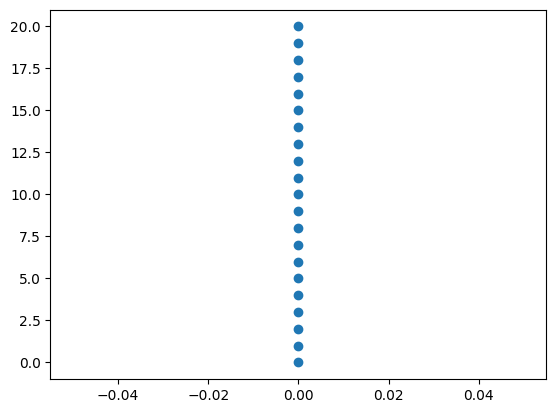

In [15]:
error_degree_realation = {}

for k,v in zip(error_matrix.flatten(),degree_matrix.flatten()):
    if k in error_degree_realation.keys():
        error_degree_realation[k].append(v)
    else:
        error_degree_realation[k] = [v]

fig, ax = plt.subplots()
ax.scatter([np.average(deg) for deg in error_degree_realation.values()],error_degree_realation.keys())
fig.show()

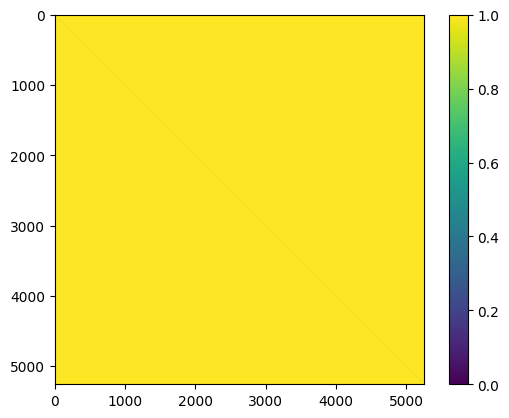

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(error_matrix >=1)
plt.colorbar()
plt.show()

In [17]:
range_error_dict = {k:[] for k in range(0,21)}
for r in zip(range_matrix.flatten(), error_matrix.flatten()):
    range_error_dict[r[0]].append(r[1])
range_error_dict_avg = {k:np.average(v) for k,v in range_error_dict.items()}

c:\Users\jaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:571: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\jaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


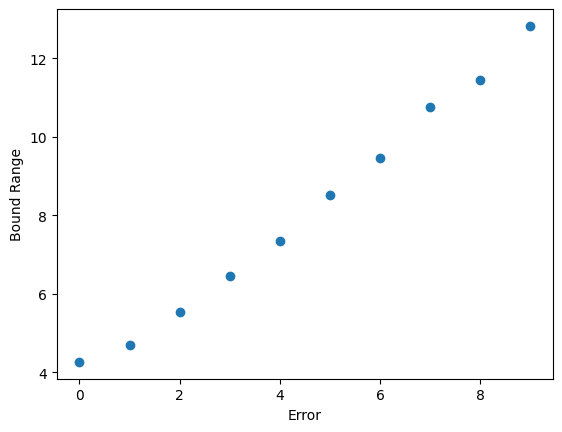

In [18]:
fig, ax = plt.subplots()
a = 10
ax.scatter(list(range_error_dict_avg.keys())[:a], list(range_error_dict_avg.values())[:a])
ax.set_ylabel('Bound Range')
ax.set_xlabel('Error')
plt.show()

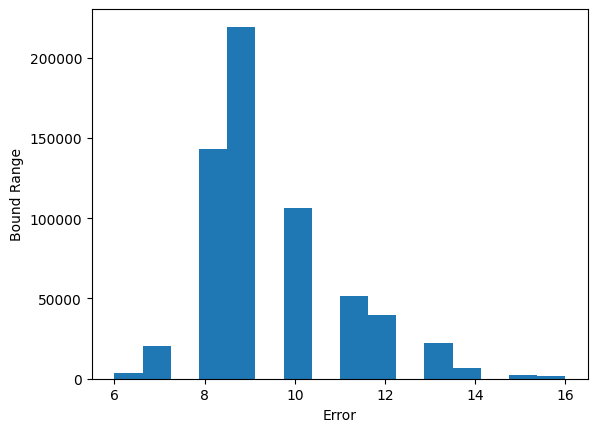

In [19]:
fig, ax = plt.subplots()
a = 6
ax.hist(range_error_dict[a], bins=int(max(range_error_dict[a])))
ax.set_ylabel('Bound Range')
ax.set_xlabel('Error')
plt.show()